### 决策树

In [207]:
import numpy as np
import pandas as pd
from collections import Counter
from scipy import stats

In [131]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [132]:
mock_data

{'gender': ['F', 'F', 'F', 'F', 'M', 'M', 'M'],
 'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
 'family_number': [1, 1, 2, 1, 1, 1, 2],
 'bought': [1, 1, 1, 0, 0, 0, 1]}

In [133]:
# 计算信息熵
def get_entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ret = - sum(p * np.log2(p) for p in probs)
    return ret

In [134]:
get_entropy(['F','F','F','F','M','M','M'])

0.9852281360342515

In [135]:
get_entropy(['+10','-10','+10','+10','+10','+10','-10'])

0.863120568566631

In [136]:
get_entropy(['1','1','2','1','1','1','2'])

0.863120568566631

In [137]:
datasets = pd.DataFrame.from_dict(mock_data)

In [138]:
datasets

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [152]:
def find_sub_spliter(train_data:pd.DataFrame,target:str):
    x_fileds = set(train_data.columns.tolist()) - {target}
#     print(x_fileds)
    
    spliter = None
    max_entropy_gain = float(0)
    
    factor = list(train_data[target]) 
    father_entropy = get_entropy(factor)   # 得到父节点的信息熵
#     print(father_entropy)
    
    for x in x_fileds:
        values = set(train_data[x])      
#         print(values)
        
        for v in values:
            sub_spliter_1 = train_data[train_data[x] == v][target].tolist()
            son_entory_1 = get_entropy(sub_spliter_1)
            v1_proportion = len(sub_spliter_1) / len(factor)
            sub_spliter_2 = train_data[train_data[x] != v][target].tolist()
            son_entory_2 = get_entropy(sub_spliter_2)
            v2_proportion = len(sub_spliter_2) / len(factor)

            v_entory = v1_proportion * son_entory_1 + v2_proportion * son_entory_2  # 子节点增加权重的信息熵

            entropy_gain = father_entropy - v_entory    # 信息增益   ID3决策树
#             print("{}信息增益为:{}".format(x,entropy_gain))

        if entropy_gain >= max_entropy_gain:
            max_entropy_gain = entropy_gain
            spliter = x
#             print(spliter)
                
    print("splier is:{}".format(spliter))
    print("the max entropy gain is:{}".format(max_entropy_gain))
    
    return spliter

In [153]:
def createTree(train_data:pd.DataFrame,target:str):
    # 选择最优的节点 和 feature
    bestlabel = find_sub_spliter(train_data,target)
    
    if bestlabel == None:
        return stats.mode(list(train_data[target]))[0][0]
    # 定义树模型
    myTree = {bestlabel:{}}
    #得到bestlabel所包含的所有属性
    tags = set(list(train_data[bestlabel]))
    
    for tag in tags:
        # 取出数据集中的类别  用于判断是否停止划分
        class_list = list(train_data[train_data[bestlabel]==tag][target])
        if class_list.count(class_list[0]) == len(class_list):
            myTree[bestlabel][tag] = class_list[0]
        else:
            myTree[bestlabel][tag]=createTree(train_data[train_data[bestlabel] == tag].drop([bestlabel],axis=1),target)
    return myTree

In [156]:
print("决策树model:{}".format(createTree(datasets,'bought')))

splier is:family_number
the max entropy gain is:0.2916919971380597
splier is:gender
the max entropy gain is:0.4199730940219749
splier is:income
the max entropy gain is:0.2516291673878229
splier is:None
the max entropy gain is:0.0
决策树model:{'family_number': {1: {'gender': {'M': 0, 'F': {'income': {'+10': 0, '-10': 1}}}}, 2: 1}}


In [157]:
decision_tree_model = createTree(datasets,'bought')

splier is:family_number
the max entropy gain is:0.2916919971380597
splier is:gender
the max entropy gain is:0.4199730940219749
splier is:income
the max entropy gain is:0.2516291673878229
splier is:None
the max entropy gain is:0.0


In [195]:
def classify(testdata,model):
    # 决策树每次只找一个最优属性，所以每一层只有一个label
    first_label = list(model.keys())[0]   
    first_judge_dict = list(model.values())[0] 
    test_fm = testdata[first_label] 
    judge_result = first_judge_dict[test_fm] 
    if isinstance(judge_result,dict):
        return classify(testdata,judge_result)
    else:
        return judge_result

In [203]:
test_data_1 = {
    'gender':'M',
    'income':'-10',
    'family_number':1
}

In [204]:
print("测试数据的类别是:{}".format(classify(test_data_1,decision_tree_model)))

测试数据的类别是:0


In [205]:
test_data_2 = {
    'gender':'F',
    'income':'-10',
    'family_number':1
}

In [206]:
print("测试数据的类别是:{}".format(classify(test_data_2,decision_tree_model)))

测试数据的类别是:1


### 线性回归

In [278]:
from sklearn.datasets import load_boston
import random
from matplotlib import pyplot as plt

In [279]:
datasets = load_boston()

In [280]:
X,y = datasets['data'],datasets['target']

In [281]:
label = datasets['feature_names']

In [282]:
datasets["DESCR"].split("\n")

['Boston House Prices dataset',
 '===========================',
 '',
 'Notes',
 '------',
 'Data Set Characteristics:  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive',
 '    ',
 '    :Median Value (attribute 14) is usually the target',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial high

In [283]:
X_RM = X[:,5]

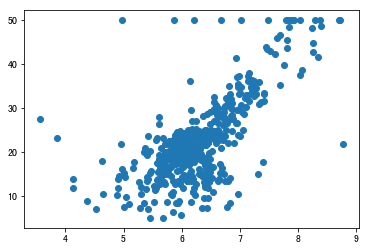

In [284]:
plt.scatter(X_RM,y)

### 假设房价price与rm符合以下线性关系
### $$ y = k * rm + b $$

In [285]:
def price(rm,k,b):
    return k * rm + b

### 使用绝对值损失函数
### $$ loss = \frac{1}{n} \sum{|(y_i - \hat{y_i})|}$$

In [286]:
def loss_function(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

In [287]:
def partial_derivative_k(x,y,y_hat):
    result = []
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        if (y_i - y_hat_i) > 0:
            result.append(-x_i)
        else:
            result.append(x_i)
    return sum(result) / len(list(y))

In [288]:
def partial_derivative_b(x,y,y_hat):
    result = []
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        if (y_i - y_hat_i) > 0:
            result.append(-1)
        else:
            result.append(1)
    return sum(result) / len(list(y))

In [290]:
k = random.random()*200 - 100
b = random.random()*200 - 100

learning_rate = 1e-3

iteration_num = 20000
losses = []

for i in range(iteration_num):
    y_hat = [price(rm,k,b) for rm in X_RM]
    
    current_loss = loss_function(list(y),y_hat)
    losses.append(current_loss)
    
#     print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_RM,y,y_hat)
    b_gradient = partial_derivative_b(X_RM,y,y_hat)
    
    k = k + (-1)*k_gradient*learning_rate
    b = b + (-1)*b_gradient*learning_rate
    
best_k = k
best_b = b

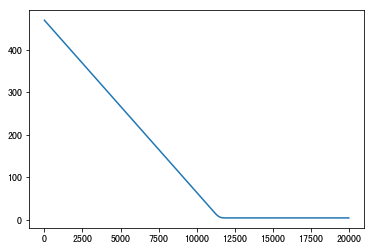

In [291]:
# iteration_num = 20000  从lossfunction的趋势图来看  迭代到12000次左右达到收敛
plt.plot(list(range(iteration_num)),losses)

In [292]:
price_use_best_parameters = [price(r,best_k,best_b) for r in X_RM]

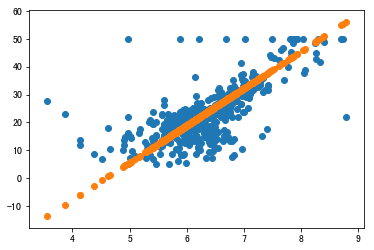

In [293]:
plt.scatter(X_RM,y)
plt.scatter(X_RM,price_use_best_parameters)